In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

In [22]:
df_cars = pd.read_csv('C:/Users/Anastasiia/Desktop/homework_kvs_python/exam/cars/cars.csv')
df_details = pd.read_csv('C:/Users/Anastasiia/Desktop/homework_kvs_python/exam/cars/details.csv')
df_operations = pd.read_csv('C:/Users/Anastasiia/Desktop/homework_kvs_python/exam/cars/operations.csv')
df_kvit = pd.read_csv('C:/Users/Anastasiia/Desktop/homework_kvs_python/exam/cars/kvitantions.csv')

In [23]:
merge_df = pd.merge(df_kvit, df_operations, on='operations_id', how='left')
merge_df = pd.merge(merge_df, df_details, left_on='detail', right_on='detail', how='left')
merge_df = pd.merge(merge_df, df_cars, on='car_id', how='left')

In [24]:
merge_df

,car_id,operations_id,num_of_details,name_operation,price_operation,detail,price_detail,brand,date
0,1,1,0,Cleaning,1000,0,0,Brand1,2023-12-12
1,2,1,0,Cleaning,1000,0,0,Brand2,2023-12-11
2,2,1,0,Cleaning,1000,0,0,Brand2,2023-12-11
3,2,2,0,Washing,1200,0,0,Brand2,2023-12-11
4,3,3,2,Replace_detail,3000,1,12000,Brand3,2023-12-11
5,4,4,1,Replace_detail,3000,2,13000,Brand1,2023-12-13
6,5,5,4,Replace_detail,3000,3,25000,Brand3,2023-12-10


In [25]:
merge_df['date'] = pd.to_datetime(merge_df['date'])

In [26]:
total_coast = ((merge_df['price_operation'] + merge_df['price_detail'] * merge_df['num_of_details'])).sum()
print(f"Загальна вартість за оплату всіх операцій: {total_coast:.2f}")

Загальна вартість за оплату всіх операцій: 150200.00


In [27]:
oplata = merge_df.groupby('name_operation')['price_operation'].sum()

oplata.head()

name_operation
Cleaning          3000
Replace_detail    9000
Washing           1200
Name: price_operation, dtype: int64

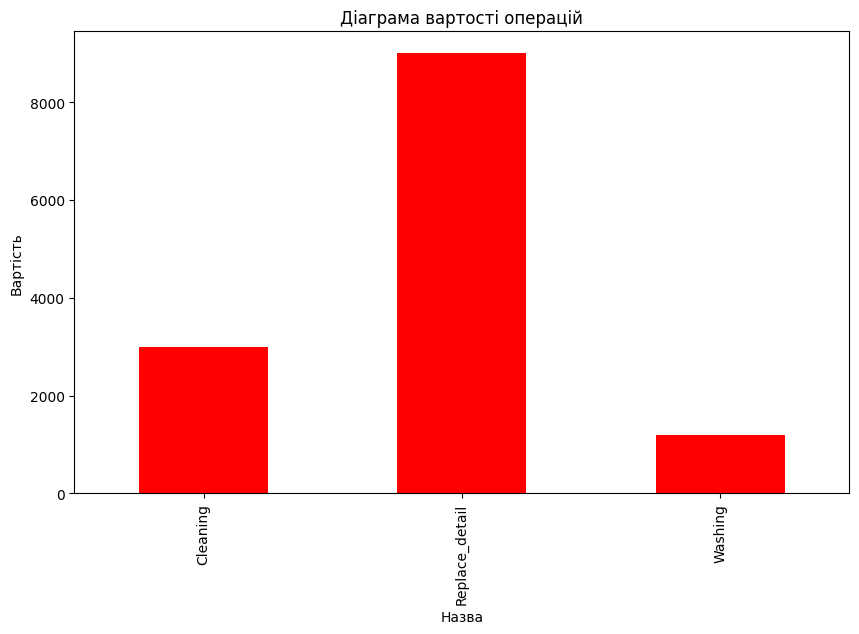

In [28]:
plt.figure(figsize=(10, 6))
oplata.plot(kind='bar', color='red')
#oplata.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['red', 'green', 'blue', 'yellow'])  # Замінено kind='bar' на kind='pie' КУРГОВА ДІАГРАММА 
plt.title('Діаграма вартості операцій')
plt.title('Діаграма вартості операцій')
plt.xlabel('Назва')
plt.ylabel('Вартість')

plt.show()

In [29]:
merge_df['brand'] = merge_df['brand'].fillna('Unknown')

In [30]:
operations_options = list(merge_df['name_operation'].unique())

operations_dropdown = widgets.Dropdown(options=operations_options, description='Choose operations')

output = widgets.Output()

def calculate_cars(selected_operation):
    total_cars_df = merge_df.groupby('brand').size().reset_index(name='total_cars')
    selected_cars = merge_df[merge_df['name_operation'] == selected_operation]
    result_df = pd.merge(selected_cars, total_cars_df, on='brand', how='inner')

    result_per_brand = result_df.groupby('brand').size()

    with output:
        output.clear_output()
        print(f'Кількість машин для операції {selected_operation}:\n{result_per_brand}')

widgets.interactive(calculate_cars, selected_operation=operations_dropdown)

display(operations_dropdown)
display(output)


Dropdown(description='Choose operations', options=('Cleaning', 'Washing', 'Replace_detail'), value='Cleaning')

Output()